# Analýza uživatelů ecommerce pro doporučování produktů
#### Autor: Matěj Foukal

V této statistické práci se budeme zabývat analýzou dat získaných od uživatelů ecommerece portálu. Stanovím si hypotézy, které následně na datech otestujeme, a také prozkoumáme korelace mezi jednotlivými atributy nashromážděných o uživatelích. Takto získané informace by v praxi typicky vedly ke stanovení lepších doporučovacích a makretingových strategií námi zkoumaného eshopu.

## Původ a struktura dat
Data byla nashromážděna od 1000 uživatelů v průběhu 2 měsíců zakladateli startupové společnosti. Byla shromážděna pro účely výzkumu a implementace personalizačních strategií v ecommerce. Celý dataset je veřejně dostupný na stránkách [kaggle.com](https://www.kaggle.com/datasets/kartikeybartwal/ecommerce-product-recommendation-collaborative/data).

In [134]:
# Naimportujeme potřebné knihovny
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Načtení dat
data = pd.read_csv("user_personalized_features.csv")

## Příprava dat a deskriptivní statistiky proměnných
Pro lepší porozumění dat, která máme k dispozici, je nejprve popíšeme pomocí statistik dostupných proměnných. Pro lepší porozumění toho, kdo jsou naši uživatelé, vizualizujeme jejich demografické údaje. Podíváme se na souvislost mezi věkem a příjmy našich uživatelů.

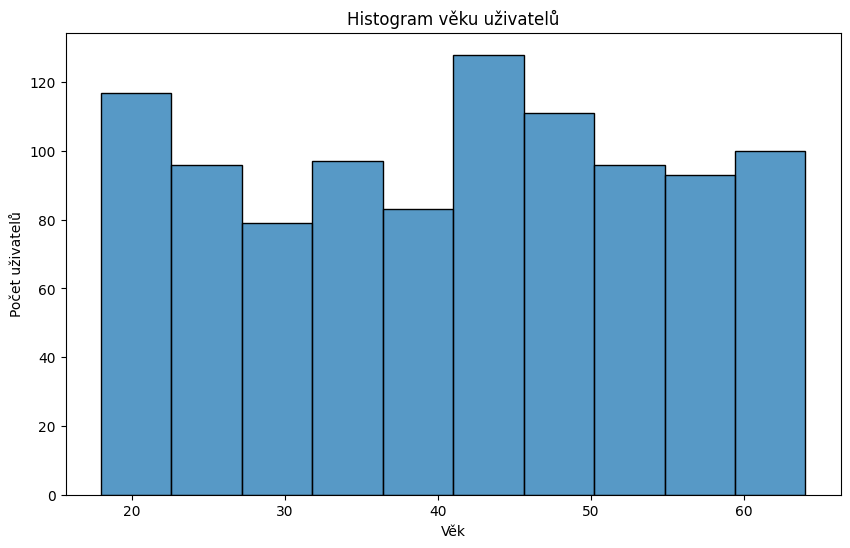

In [135]:
# Zobrazení dat pro věk uživatelů - klasický histogram s 10 biny
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data["Age"], bins=10, kde=False, ax=ax)
ax.set_title("Histogram věku uživatelů")
ax.set_xlabel("Věk")
ax.set_ylabel("Počet uživatelů")

# Uložení grafu do proměnné
graph1 = fig

# Zobrazení grafu
plt.show()

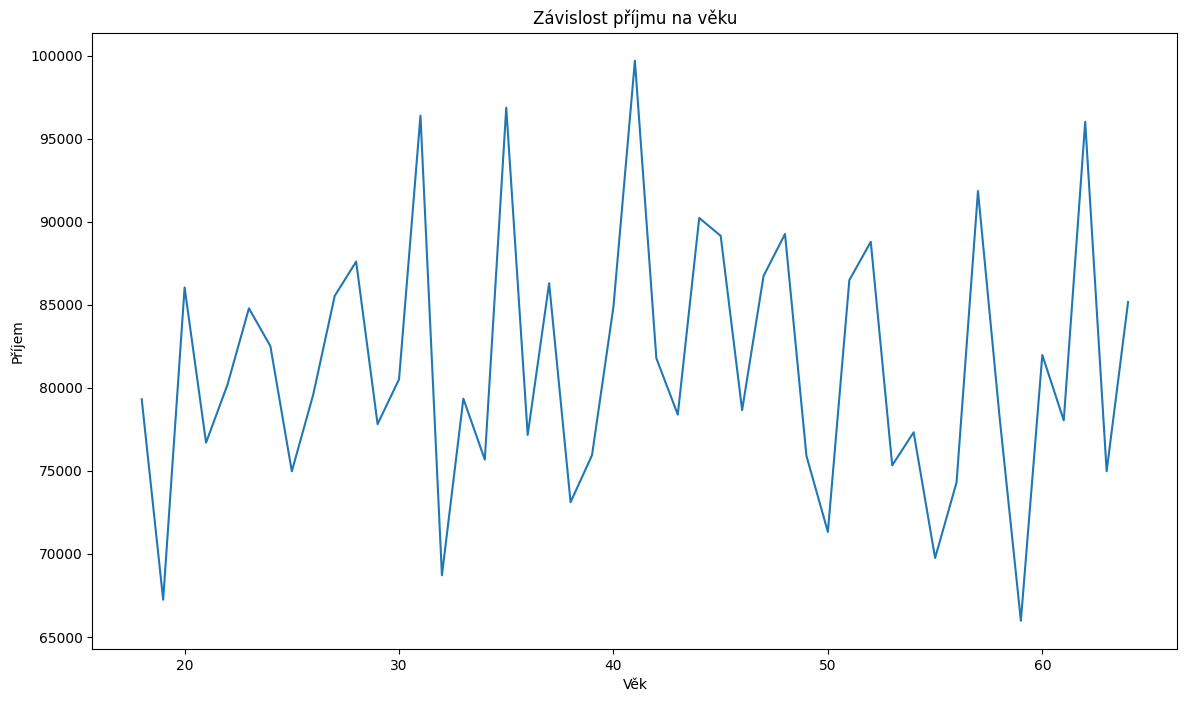

In [136]:
# Souvislost mezi věkem a příjmem
fig2, ax2 = plt.subplots(figsize=(14, 8))
sns.lineplot(x="Age", y="Income", data=data, errorbar=None, ax=ax2)
ax2.set_title("Závislost příjmu na věku")
ax2.set_xlabel("Věk")
ax2.set_ylabel("Příjem")

# Uložení grafu do proměnné
graph2 = fig2

# Zobrazení grafu
plt.show()

## Korelace

### 1.  Zjistíme, zda uživatelé, kteří nakupují častěji (Purchase_Frequency), mají nižší nebo vyšší průměrnou hodnotu objednávky (Average_Order_Value).
Tímto testem chceme zjistit, zda existuje vztah mezi tím, jak často uživatelé nakupují a jakou mají průměrnou hodnotu objednávky. Toto nám může pomoci pochopit, zda častější nakupující mají tendenci utrácet více nebo méně na jednu objednávku. Použijeme Pearsonovu korelaci, protože obě proměnné jsou spojité a předpokládáme lineární vztah mezi nimi.

Korelace mezi frekvencí nákupů a průměrnou hodnotou objednávky: -0.03 (p-hodnota: 3.68e-01)


<Figure size 1000x600 with 0 Axes>

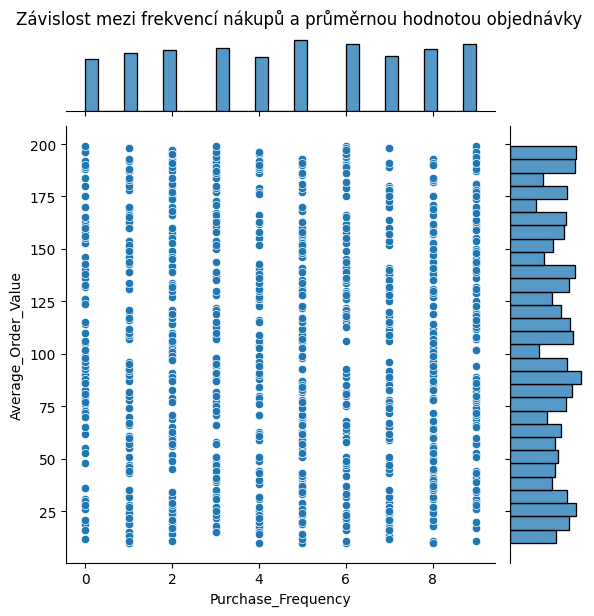

In [137]:
# 1. Korelace mezi frekvencí nákupů a průměrnou hodnotou objednávky
corr_freq_order_value, p_value_freq_order_value = stats.pearsonr(
    data["Purchase_Frequency"], data["Average_Order_Value"]
)
print(
    f"Korelace mezi frekvencí nákupů a průměrnou hodnotou objednávky: {corr_freq_order_value:.2f} (p-hodnota: {p_value_freq_order_value:.2e})"
)

# Vizualizace závislosti s hexbin plotem
plt.figure(figsize=(10, 6))
sns.jointplot(
    x="Purchase_Frequency",
    y="Average_Order_Value",
    data=data,
    kind="scatter",
    marginal_kws=dict(bins=30, fill=True),
)
plt.suptitle("Závislost mezi frekvencí nákupů a průměrnou hodnotou objednávky", y=1.02)
plt.show()

### 2. Zjistíme, zda vyšší příjem (Income) souvisí s vyššími celkovými výdaji (Total_Spending).
Zde budeme zkoumat, zda vyšší příjem uživatele souvisí s vyššími celkovými výdaji. Tato informace je klíčová pro pochopení spotřebitelského chování a plánování marketingových strategií. Opět použijeme Pearsonovu korelaci vzhledem k povaze dat a předpokladu lineárního vztahu.

Korelace mezi příjmem a celkovými výdaji: -0.08 (p-hodnota: 7.49e-03)


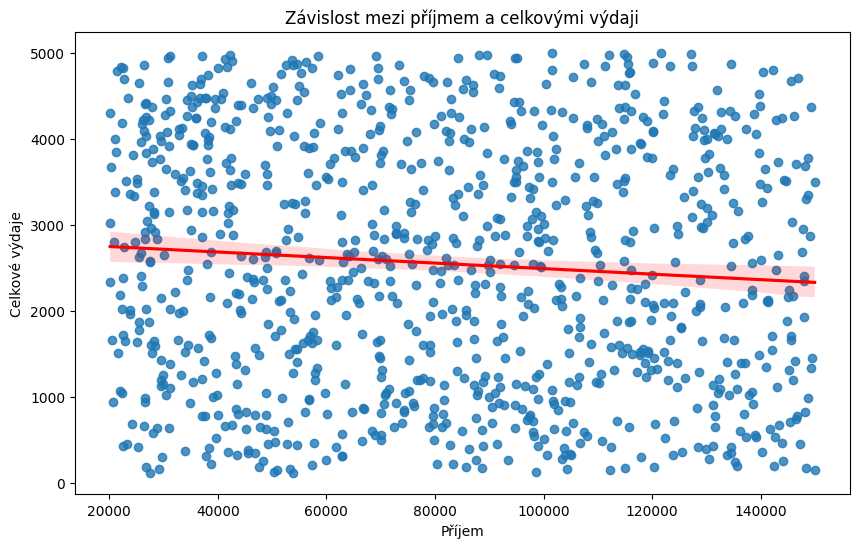

In [138]:
# 2. Korelace mezi příjmem a celkovými výdaji
corr_income_spending, p_value_income_spending = stats.pearsonr(
    data["Income"], data["Total_Spending"]
)
print(
    f"Korelace mezi příjmem a celkovými výdaji: {corr_income_spending:.2f} (p-hodnota: {p_value_income_spending:.2e})"
)

# Vizualizace závislosti s regresní přímkou
plt.figure(figsize=(10, 6))
sns.regplot(x="Income", y="Total_Spending", data=data, line_kws={"color": "red"})
plt.title("Závislost mezi příjmem a celkovými výdaji")
plt.xlabel("Příjem")
plt.ylabel("Celkové výdaje")
plt.show()

## Testování hypotéz
Otestujeme následující hypotézy:
### 1. Vliv lokality uživatelů (suburban, rural, urban) na hodnotu objednávky:
   - Nulová hypotéza (H0): Průměrná hodnota objednávky je stejná pro všechny tři lokality.
   - Alternativní hypotéza (H1): Průměrná hodnota objednávky se liší mezi lokalitami.

T-test mezi Suburban a Rural: t-statistic = -0.4867, p-value = 0.6266
Nulová hypotéza (H0) pro lokality 'Suburban' a 'Rural' není zamítnuta.
T-test mezi Suburban a Urban: t-statistic = -1.1792, p-value = 0.2387
Nulová hypotéza (H0) pro lokality 'Suburban' a 'Urban' není zamítnuta.
T-test mezi Rural a Urban: t-statistic = -0.6496, p-value = 0.5162
Nulová hypotéza (H0) pro lokality 'Rural' a 'Urban' není zamítnuta.


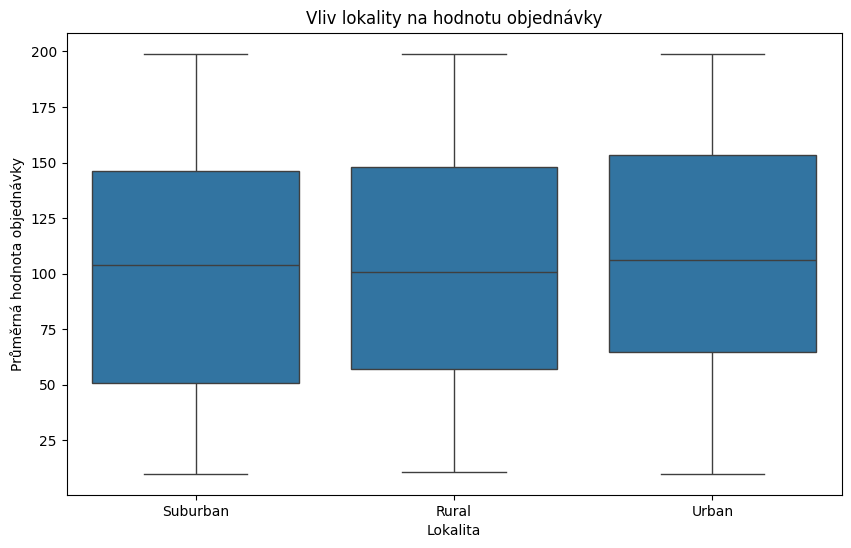

In [139]:
# Funkce pro provedení t-testu mezi dvěma lokalitami
def t_test_location(data, location1, location2):
    # Výběr dat pro jednotlivé lokality
    group1 = data[data["Location"] == location1]["Average_Order_Value"]
    group2 = data[data["Location"] == location2]["Average_Order_Value"]

    # T-test
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return t_stat, p_value


# Párové t-testy
locations = ["Suburban", "Rural", "Urban"]
alpha = 0.05

# Provedení t-testů pro všechny dvojice lokalit
for i in range(len(locations)):
    for j in range(i + 1, len(locations)):
        loc1, loc2 = locations[i], locations[j]
        t_stat, p_value = t_test_location(data, loc1, loc2)
        print(
            f"T-test mezi {loc1} a {loc2}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}"
        )
        if p_value < alpha:
            print(f"Pro lokality '{loc1}' a '{loc2}' zamítáme nulovou hypotézu (H0).")
        else:
            print(
                f"Nulová hypotéza (H0) pro lokality '{loc1}' a '{loc2}' není zamítnuta."
            )

# Vizualizace
plt.figure(figsize=(10, 6))
sns.boxplot(x="Location", y="Average_Order_Value", data=data)
plt.title("Vliv lokality na hodnotu objednávky")
plt.xlabel("Lokalita")
plt.ylabel("Průměrná hodnota objednávky")
plt.show()

### 2. Vliv zájmů na frekvenci nákupů:
   - Nulová hypotéza (H0) Zájmy uživatelů nemají vliv na frekvenci nákupů.
   - Alternativní hypotéza (H1): Zájmy uživatelů mají vliv na frekvenci nákupů.

Zájem: Fashion - T-test: t-statistic = -1.2852, p-value = 0.1990
Nulová hypotéza (H0) pro zájem 'Fashion' není zamítnuta.
Zájem: Food - T-test: t-statistic = 0.3458, p-value = 0.7296
Nulová hypotéza (H0) pro zájem 'Food' není zamítnuta.
Zájem: Sports - T-test: t-statistic = 0.0162, p-value = 0.9870
Nulová hypotéza (H0) pro zájem 'Sports' není zamítnuta.
Zájem: Technology - T-test: t-statistic = 2.3143, p-value = 0.0209
Pro zájem 'Technology' zamítáme nulovou hypotézu (H0).
Zájem: Travel - T-test: t-statistic = -1.3107, p-value = 0.1902
Nulová hypotéza (H0) pro zájem 'Travel' není zamítnuta.


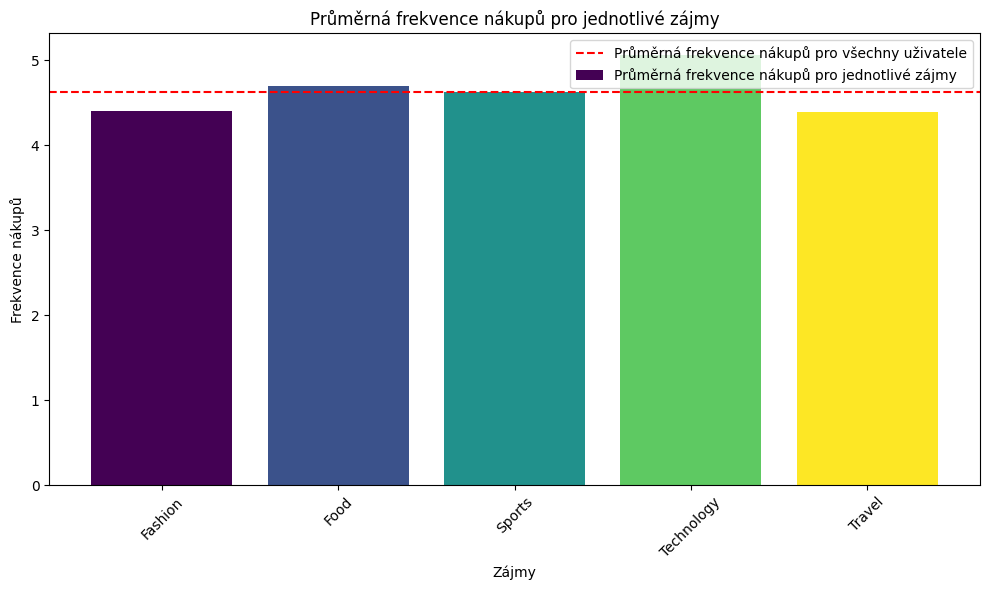

In [140]:
# Vytvoření binárních proměnných pro zájmy
interests_dummies = data["Interests"].str.get_dummies(sep=",")

# Přidáme frekvenci nákupů k binárním proměnným
interests_dummies["Purchase_Frequency"] = data["Purchase_Frequency"]


# Funkce pro provedení t-testu pro zájem
def t_test_interest(interests_dummies, interest):
    group1 = interests_dummies[interests_dummies[interest] == 1]["Purchase_Frequency"]
    group2 = interests_dummies[interests_dummies[interest] == 0]["Purchase_Frequency"]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return t_stat, p_value


# Testování hypotézy pro každý zájem
alpha = 0.05
for interest in interests_dummies.columns[:-1]:
    t_stat, p_value = t_test_interest(interests_dummies, interest)
    print(
        f"Zájem: {interest} - T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}"
    )
    if p_value < alpha:
        print(f"Pro zájem '{interest}' zamítáme nulovou hypotézu (H0).")
    else:
        print(
            f"Nulová hypotéza (H0) pro zájem '{interest}' není zamítnuta."
        )

df = pd.DataFrame(data)

# Vypočítáme průměrnou frekvenci nákupů pro každý zájem
mean_purchase_freq = df.groupby("Interests")["Purchase_Frequency"].mean()

# Průměrná frekvence nákupů pro všechny uživatele
overall_avg_purchase_freq = df["Purchase_Frequency"].mean()

mean_purchase_freq_dict = mean_purchase_freq.to_dict()
mean_purchase_freq_df = pd.DataFrame(
    list(mean_purchase_freq_dict.items()),
    columns=["Interests", "Mean_Purchase_Frequency"],
)

# Vybereme barvy pro jednotlivé zájmy
colors = plt.cm.viridis(np.linspace(0, 1, len(mean_purchase_freq_df)))

# Vizualizace
plt.figure(figsize=(10, 6))
plt.bar(
    mean_purchase_freq_df["Interests"],
    mean_purchase_freq_df["Mean_Purchase_Frequency"],
    color=colors,
    label="Průměrná frekvence nákupů pro jednotlivé zájmy",
)
plt.axhline(
    overall_avg_purchase_freq,
    color="red",
    linestyle="--",
    label="Průměrná frekvence nákupů pro všechny uživatele",
)
plt.xlabel("Zájmy")
plt.ylabel("Frekvence nákupů")
plt.title("Průměrná frekvence nákupů pro jednotlivé zájmy")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Závěr

### Korelace

### Testování hypotéz

### Nedostatky dat
